# Column translation

In [1]:
import os
import sys

# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from Translator import Translator
from preprocessor import define_blocks
from visualization import plot_blocks

# Define language and translator functions
language = "es"
translator = Translator(language)
to_lang = translator.translate_to_language
to_col = translator.translate_to_column

# Load data
raw_data = pd.read_csv("sample.txt", header=0, skiprows=1, delimiter="\t", index_col=0, usecols=list(range(0, 9)),
                       parse_dates=to_lang(["Datetime"]), decimal=",",
                       date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))
# Translate column names
raw_data.columns = (to_col(raw_data.columns))

raw_data.iloc[[0, 1, 7, 8]]

,Datetime,Register_Type,Glucose_Auto,Glucose_Manual,Rapid_Insulin_No_Val,Rapid_Insulin,Carbo_No_Val,Carbo
ID,,,,,,,,
36781,2016-03-31 15:44:00,1,NaN,64.0,NaN,NaN,NaN,NaN
36817,2016-03-31 15:43:00,0,61.0,NaN,NaN,NaN,NaN,NaN
36823,2016-03-31 17:23:00,4,NaN,NaN,NaN,1.0,NaN,NaN
36823,2016-03-31 17:23:00,5,NaN,NaN,NaN,NaN,NaN,1.5


# Divide in blocks

In [3]:
data = define_blocks(raw_data)
data[data["Datetime"].dt.date == datetime.date(2016, 4, 1)]

,Datetime,Glucose_Auto,Block,Day_Block,Overlapped_Block,Carbo_Block,Rapid_Insulin_Block
33,2016-04-01 00:01:00,82.0,2,2016-03-31,False,1.0,1.0
34,2016-04-01 00:16:00,84.0,2,2016-03-31,False,1.0,1.0
35,2016-04-01 00:31:00,95.0,2,2016-03-31,False,1.0,1.0
36,2016-04-01 00:46:00,96.0,2,2016-03-31,False,1.0,1.0
37,2016-04-01 01:01:00,96.0,2,2016-03-31,False,1.0,1.0
38,2016-04-01 01:18:00,113.0,2,2016-03-31,False,1.0,1.0
39,2016-04-01 01:33:00,141.0,0,2016-04-01,False,0.0,0.0
40,2016-04-01 01:48:00,156.0,0,2016-04-01,False,0.0,0.0
41,2016-04-01 02:03:00,148.0,0,2016-04-01,False,0.0,0.0
42,2016-04-01 02:18:00,156.0,0,2016-04-01,False,0.0,0.0


<IPython.core.display.Javascript object>


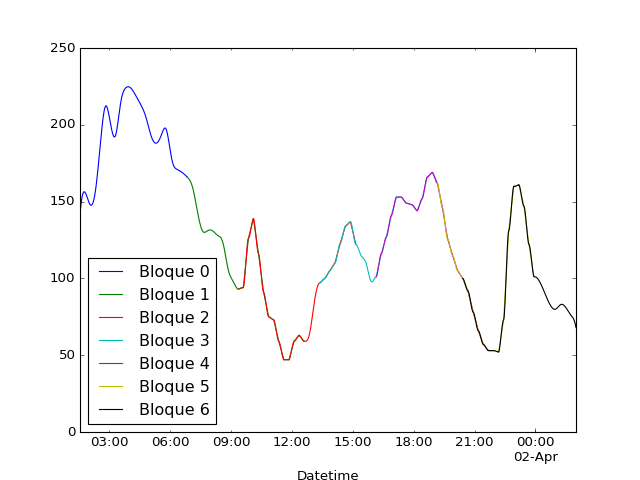

In [6]:
plot_blocks(data, datetime.date(2016, 4, 1), translator)